1.0108392604446956


<function matplotlib.pyplot.show(close=None, block=None)>

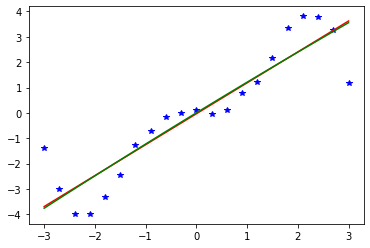

In [39]:
import numpy as np
import matplotlib.pyplot as plt


def model1(dane,X,Y):
  sumaX = 0
  sumaX2 = 0
  sumaY = 0
  sumaXY = 0
  dl = len(X)

  for i in range(dl):
    sumaX += X[i]
    sumaX2 += X[i]**2
    sumaY += Y[i]
    sumaXY += X[i]*Y[i]
  w1 = (sumaXY*dl - sumaX*sumaY)/(dl*sumaX2 - (sumaX**2))
  w0 = (sumaY*sumaX2 - sumaX*sumaXY)/(dl*sumaX2 - (sumaX**2))
  danew = []
  for i in dane:
    danew.append(w1*i+w0)
  return danew


def model2(dane,X,Y):
  sumaX=0
  sumaX2=0
  sumaX3=0
  sumaX4=0
  sumaY=0
  sumaXY=0
  sumaX2Y=0
  dl = len(X)
  
  for i in range(dl):  
    sumaX += X[i]
    sumaX2 += X[i]**2
    sumaX3 += X[i]**3
    sumaX4 += X[i]**4
    sumaY += Y[i]
    sumaXY += X[i]*Y[i]
    sumaX2Y += X[i]**2*Y[i]
  m1 = np.array([[sumaX4, sumaX3, sumaX2],[sumaX3, sumaX2, sumaX],[sumaX2, sumaX, dl]])
  m2 = np.array([sumaX2Y, sumaXY, sumaY])
  m1 = np.linalg.inv(m1)
  m = m1@m2

  w2 = m[0]
  w1 = m[1]
  w0 = m[2]
  danew = []
  for i in dane:
    w = w2*(i**2)+w1*i+w0
    danew.append(w)
  return danew



file = open("Dane/dane{}.txt".format(4), "r")
X = []
Y = []

for x in file:
  point = x.split(" ")
  point.remove('\n')
  X.append(float(point[0]))
  Y.append(float(point[1]))



dl = len(X)/3
podzial = round(dl)

trainX = []
trainY = []

i=0
while i < len(X):
  trainX.append(X[i])  
  trainY.append(Y[i])  
  i+=2

testX = []
testY = []
i=0
while i < len(X):
  testX.append(X[i])  
  testY.append(Y[i])  
  i+=3


m1test = model1(testX, trainX, trainY)
m2test = model2(testX, trainX, trainY)



def calc_error(dane, model):
    mse = 0
    for i in range(0, len(dane)):
        diff = (float(model[i]) - float(dane[i]))**2
        mse = mse + diff
    mse = mse/(len(dane))
    return mse
        
mse_model1 = calc_error(testY, m1test)
mse_model2 = calc_error(testY, m1test)
print(mse_model1)
print(mse_model)

plt.plot(testX, testY, 'b*')
plt.plot(testX, m1test, 'r')
plt.plot(testX, m2test, 'g')
plt.show
plt.show
